@lohninger_typology_2020 review evidence from a variety of both "functional-typological and structural-grammatical approaches to complementation" [@givon_binding_1980; cristofaro_subordination_2005; noonan_complementation_2007] that "...there is a possibly universal implicational complementation hierarchy which is defined semantically and detectable through a diverse set of grammatical properties" and that "[w]hile the distribution of morphosyntactic properties varies significantly across languages, the semantic grouping of complement types shows a (more) stable distribution" (*ibid*, p. 33).


and "that the categories of the implicational complementation hierarchy [ICH] can be
defined as Propositions, Situations, and Events, adopting the terminology and definitions in Ramchand & Svenonius (2014) (similar classifications have been proposed in Rochette 1988; 1990, Pesetsky 1992 under different labels).

In [1]:
# !wget http://megaattitude.io/projects/mega-acceptability/mega-acceptability-v1.zip -P data/
# !unzip data/mega-acceptability-v1.zip -d data/

data_dir = "./data/mega-acceptability-v1/"

In [3]:
import os
from pandas import DataFrame, read_csv

def load_data(fname: str, verbose: bool = True) -> DataFrame:
    # read the raw data skipping comment rows at the beginning
    data = read_csv(fname, sep="\t")
    
    if verbose:
        n_datapoints = data.shape[0]
        print(f"The full dataset has {n_datapoints} datapoints.")
    
    # remove non-native speakers
    data = data.query("nativeenglish")
    
    if verbose:
        n_datapoints_native = data.shape[0]
        print(f"Removing {n_datapoints - n_datapoints_native} "
              "responses from nonnative speakers.")
    
    # remove NaN judgments
    data = data.query("~response.isnull()")
    
    if verbose:
        n_datapoints_nonnull = data.shape[0]
        print(f"Removing {n_datapoints_native - n_datapoints_nonnull} NA responses.")
    
    return data

In [4]:
data = load_data(os.path.join(data_dir, "mega-acceptability-v1.tsv"))

data.head()

NameError: name 'data_dir' is not defined

array(['NP was Ved whichNP to VP', 'NP Ved for NP to VP',
       'NP Ved NP to VP[+eventive]', 'NP was Ved whether to VP',
       'NP Ved to VP[+eventive]', 'NP Ved NP to NP', 'NP Ved NP that S',
       'NP was Ved about NP', 'NP was Ved that S[-tense]',
       'NP Ved to NP that S[+future]', 'NP Ved whether to VP',
       'NP Ved whichNP to VP', 'NP Ved about whether S',
       'NP Ved whichNP S', 'NP Ved that S[-tense]',
       'NP Ved whether S[+future]', 'NP was Ved that S[+future]',
       'NP Ved to NP whether S', 'NP Ved', 'NP Ved NP to VP[-eventive]',
       'NP was Ved so', 'NP Ved so', 'NP Ved NP that S[+future]',
       'NP Ved NP whether S[+future]', 'NP Ved to NP whether S[+future]',
       'NP was Ved that S', 'NP Ved NP whether S', 'NP was Ved whether S',
       'NP was Ved to VP[-eventive]', 'NP Ved NP VP', 'NP Ved VPing',
       'NP was Ved to VP[+eventive]', 'NP Ved NP that S[-tense]',
       'NP Ved that S', 'NP was Ved', 'NP Ved S',
       'NP Ved that S[+future]', 

@white_computational_2016 model the ordinal acceptability judgments $r_n$ associated with a sentence $\text{sent}(n)$ to be a function of the probability $\alpha_{vf}$ that the main clause verb $v = \text{verb}(n)$ in $\text{sent}(n)$ is acceptable in the syntactic frame $f = \text{frame}(i)$ instantiated in $\text{sent}(n)$.^[In fact, not all predicates found in their sentences are necessarily verbs. Some–e.g. *annoy*–are likely to be (deverbal) adjectives in some frames. We'll continue to just refer to these predicates as verbs.] They model this probability as a function of two other kinds of probability: (i) the probability $\lambda_{vs}$ that a particular verb $v$ can have a particular semantic type signature $s$; and (ii) the probability $\mu_{sf}$ that a particular semantic type signature $s$ can be mapped onto a particular syntactic frame $f$.

The basic idea is that we should predict a verb to be good–modulo other factors, such as its case assignment properties [@pesetsky_zero_1991]–in a particular syntactic frame insofar as it can have at least one semantic type signature that maps onto that frame. That is, they define the probability $\alpha_{vf}$ that a main clause verb $v$ is acceptable in a syntactic frame $f$ to be $p\left(\bigvee_s l_{vs} \land m_{sf}\right)$, where:

$$\begin{align*}
l_{vs} &= \begin{cases}
\top & \text{if } v \text{ can have semantic type signature } s\\
\bot & \text{otherwise}
\end{cases}\\
m_{sf} &= \begin{cases}
\top & \text{if } s \text{ can map onto syntactic frame } f\\
\bot & \text{otherwise}
\end{cases}
\end{align*}$$

Insofar as a verb's having a particular type signature is independent of that type signature mapping onto a particular syntactic frame, this probability can be *factored* into an expression in terms of $\lambda_{vs}$ and $\mu_{sf}$:

$$\begin{align*}
p\left(\bigvee_s l_{vs} \land m_{sf}\right) &= p\left(\lnot\lnot\bigvee_s l_{vs} \land m_{sf}\right)\\
&= 1 - p\left(\lnot\bigvee_s l_{vs} \land m_{sf}\right)\\
&= 1 - p\left(\bigwedge_s \lnot\left[ l_{vs} \land m_{sf}\right]\right)\\
&= 1 - \prod_s p\left(\lnot\left[ l_{vs} \land m_{sf}\right]\right)\\
&= 1 - \prod_s 1 - p\left(l_{vs} \land m_{sf}\right)\\
&= 1 - \prod_s 1 - p\left(l_{vs}\right)p\left(m_{sf}\right)\\
&= 1 - \prod_s 1 - \lambda_{vs}\mu_{sf}\\
\end{align*}$$

Importantly, they assume: (a) that verbs can be compatible with multiple semantic type signatures; (b) that multiple semantic type signatures can map onto the same frame; and (c) that multiple frames can be mapped onto by the same semantic type signature. So $\sum_s \lambda_{vs}$ and $\sum_s \mu_{sf}$ can be anywhere between $0$ and the number of type signatures, and $\sum_f \mu_{sf}$ can be anywhere between $0$ and the number of syntactic frames. None of the three need to be $1$.

### Matrix factorization

Solving for $\lambda_{vs}$ and $\mu_{sf}$, from which $\alpha_{vf}$ can be computed deterministically, is an instance of a [matrix factorization](https://en.wikipedia.org/wiki/Matrix_decomposition) problem–of which [principal component analysis](https://en.wikipedia.org/wiki/Principal_component_analysis) [PCA; @pearson_lines_1901], [factor analysis](https://en.wikipedia.org/wiki/Factor_analysis) (FA), and [postive/non-negative matrix factorization](https://en.wikipedia.org/wiki/Non-negative_matrix_factorization) [NMF; @paatero_positive_1994] are common forms. 

In matrix factorization problems where we assume that the matrices are constituted by real numbers–e.g. FA and NMF–we assume that the distribution of observed values $y_n$ is parameterized by $$ 

### Non-parametric priors

@white_computational_2016 select the number of semantic type signatures on the basis of an information: the Akaike Information Criterion (AIC). Rather than sweep many possible numbers of semantic type signatures, we'll instead use a nonparametric prior@teh_stick-breaking_2007 equation 5

$$\mu_k \equiv \begin{cases}
\sigma_k & \text{if } k = 1\\ 
\mu_{k-1}\sigma_k & \text{otherwise}
\end{cases}$$

where $\sigma_k \sim \text{Beta}(\alpha, 1)$.

In [5]:
from typing import Optional
from numpy import ndarray
from pandas import CategoricalDtype, Series

def hash_series(series: Series, categories: Optional[list[str]] = None, indexation: int=1) -> tuple[ndarray, ndarray]:
    """Hash a series to numeric codes
    
    Parameters
    ----------
    column
        The series to hash
    index
        The starting index (defaults to 1)
    """
    # enforce 0- or 1-indexation
    if indexation not in [0, 1]:
        raise ValueError("Must choose either 0- or 1-indexation.")
    
    # convert the series to a category
    if categories is None:
        category_series = series.astype("category")
    else:
        cat_type = CategoricalDtype(categories=categories)
        category_series = series.astype(cat_type)
    
    # get the hash
    hash_map = category_series.cat.categories.values
    
    # map to one-indexed codes
    hashed_series = (category_series.cat.codes + indexation).values
    
    return hash_map, hashed_series

In [2]:
from typing import Optional
from dataclasses import dataclass
from numpy import ndarray
from cmdstanpy import CmdStanModel
from arviz import InferenceData

@dataclass
class SelectionData:
    N_verb: int
    N_frame: int
    N_component: int
    N_subj: int
    N_resp: int
    N_resp_levels: int
    verb: ndarray
    frame: ndarray
    subj: ndarray
    resp: ndarray
    
class SelectionModel:
    stan_file = "./models/fuzzy-logic-factorization.stan"
    data_class = SelectionData
    
    def __init__(self, n_component: int):
        self.model = CmdStanModel(stan_file=self.stan_file)
        self.n_component = n_component
        
    def construct_model_data(self, data: DataFrame):
        self.verb_hash_map, verb_hashed = hash_series(data.verb)
        self.frame_hash_map, frame_hashed = hash_series(data.frame)
        self.subj_hash_map, subj_hashed = hash_series(data.participant)
        
        model_data = {
            "N_verb": self.verb_hash_map.shape[0],
            "N_frame": self.frame_hash_map.shape[0],
            "N_component": self.n_component,
            "N_subj": self.subj_hash_map.shape[0],
            "N_resp": data.shape[0],
            "N_resp_levels": 7,
            "verb": verb_hashed,
            "frame": frame_hashed,
            "subj": subj_hashed,
            "resp": data.response.astype(int).values
        }
        
        return model_data
        
    def _validate_data(self):
        self.data_class(**self.model_data)

    def fit(
        self, 
        data: DataFrame,
        save_dir: Optional[str] = None,
        verbose: bool = True,
    ) -> InferenceData:
        self.model_data = self.construct_model_data(data)
        
        self._validate_data()
        
        if verbose:
            print("Fitting model...")
        
        self.fit_type = fit_type

        self.model_fit = self.model.optimize(
            data=self.model_data
        )
    
        if save_dir is not None:
            if verbose:
                print("Saving model...")

            self.save(save_dir)
    
        return self
    
    def save(self, save_dir: str = "."):
        self.raw_model_fit.save_csvfiles(save_dir)
    
    @classmethod
    def from_csv(cls, path: str, **kwargs):
        model = cls(**kwargs)
        model.raw_model_fit = cmdstanpy.from_csv(path)

NameError: name 'pd' is not defined

In [ ]:
model = UnconstrainedSelectionModel(2, 1., False).fit(data, fit_type=FitType.OPTIMIZE)

In [ ]:
import seaborn as sns

from scipy.stats import spearmanr

data["prediction"] = model.raw_model_fit.stan_variable('mu')

_ = sns.boxplot(data, x="response", y="prediction")

spearmanr(data[["response", "prediction"]])

In [ ]:
model.raw_model_fit.stan_variables()

In [ ]:
torch.tensor??

In [12]:
@dataclass
class BaseSelectionModelParameters:
    n_verb: int
    n_frame: int
    n_subj: int
    n_resp_levels: int
    
@dataclass
class SelectionModelParameters(BaseSelectionModelParameters):
    n_component: int

@dataclass
class SelectionData:
    verb: ndarray
    frame: ndarray
    subj: ndarray
    resp: ndarray

$$C_{sr} - C_{s(r-1)} \sim \text{Exponential}\left(\lambda^\text{subj}_r\right)$$

We also enforce that the mean of the cutpoints for each participant is 0.

In [56]:
import torch
from torch import Tensor

def ordered_logistic_likelihood(value: Tensor, jumps: Tensor, center: bool = True) -> Tensor:
    """Compute the ordered logistic likelihood given a value
    
    Parameters
    ----------
    value
        The value to compute the likelihood for 
        (shape: batch_size)
    jumps
        The distance between cutpoints 
        (shape: batch_size x number of response levels - 1)

    Returns
    -------
    log_likelihood
        the ordered logistic log-likelihood
    """
    cutpoints = torch.cumsum(jumps, axis=1) 
    
    if center:
        cutpoints = cutpoints - cutpoints.mean(1)[:,None]
    
    cdfs = torch.sigmoid(cutpoints - value[:,None])

    low_prob = torch.cat(
        [torch.zeros([cdfs.shape[0], 1]), cdfs],
        axis=1
    )
    high_prob = torch.cat(
        [cdfs, torch.ones([cdfs.shape[0], 1])],
        axis=1
    )
    
    return high_prob - low_prob

In [57]:
from torch import manual_seed
manual_seed(302983)

ZERO = 1e-3
ONE = 1. - ZERO

class SelectionModel(torch.nn.Module):
    parameter_class = SelectionModelParameters
    data_class = SelectionData
    
    def __init__(self, parameters: SelectionModelParameters):
        super().__init__()
        
        self.model_parameters = parameters
        
        # prior parameters
        self.verb_component_prior_mean_aux = torch.nn.Parameter(
            torch.randn(parameters.n_component), 
            requires_grad=True
        )
        self.frame_component_prior_mean_aux = torch.nn.Parameter(
            torch.randn(parameters.n_component), 
            requires_grad=True
        )
        
        self.verb_component_prior_precision_aux = torch.nn.Parameter(
            torch.randn(parameters.n_component), 
            requires_grad=True
        )
        self.frame_component_prior_precision_aux = torch.nn.Parameter(
            torch.randn(parameters.n_component), 
            requires_grad=True
        )
        
        # latent matrices
        self.verb_component_aux = torch.nn.Parameter(
            torch.randn([
                parameters.n_verb, parameters.n_component
            ]), 
            requires_grad=True
        )
        self.frame_component_aux = torch.nn.Parameter(
            torch.randn([
                parameters.n_frame, parameters.n_component
            ]), 
            requires_grad=True
        )
        
        # likelihood parameters
        self.log_jumps = torch.nn.Parameter(
            torch.ones([
                parameters.n_subj, parameters.n_resp_levels-1
            ]), 
            requires_grad=True
        )

    def forward(self, data: SelectionData):
        verb_frame_prob = self.verb_frame_prob(
            data.verb, data.frame,
            clamp=True
        )
        verb_frame_logodds = torch.log(verb_frame_prob) - torch.log(1. - verb_frame_prob)
        
        jumps = self.jumps[data.subj]
        
        return ordered_logistic_likelihood(
            verb_frame_logodds, jumps
        )
    
    def verb_frame_prob(
        self, 
        verb_idx: Optional[ndarray] = None, 
        frame_idx: Optional[ndarray] = None,
        clamp: bool = False
    ) -> Tensor:
        if verb_idx is not None or frame_idx is not None:
            acc = 1. - torch.prod(
                1. - self.verb_component_prob[verb_idx,:] * 
                     self.frame_component_prob[frame_idx,:],
                axis=1
            ).clamp(ZERO, ONE)
        elif verb_idx is None and frame_idx is not None:
            acc = 1. - torch.prod(
                1. - self.verb_component_prob[:,None,:] * 
                     self.frame_component_prob[:,frame_idx,:],
                axis=2
            ).clamp(ZERO, ONE)
        elif verb_idx is not None and frame_idx is None:
            acc = 1. - torch.prod(
                1. - self.verb_component_prob[verb_idx,None,:] * 
                     self.frame_component_prob[None,:,:],
                axis=2
            ).clamp(ZERO, ONE)
        else:
            acc = 1. - torch.prod(
                1. - self.verb_component_prob[:,None,:] * 
                     self.frame_component_prob[None,:,:],
                axis=2
            )
            
        if clamp:
            return acc.clamp(ZERO, ONE)
        else:
            return acc
    
    @property
    def verb_component_prob(self) -> Tensor:
        return torch.sigmoid(self.verb_component_aux)
    
    @property
    def frame_component_prob(self) -> Tensor:
        return torch.sigmoid(self.frame_component_aux)
    
    @property
    def jumps(self):
        return torch.exp(self.log_jumps)
    
    @property
    def verb_component_prior_mean(self):
        return torch.sigmoid(self.verb_component_prior_mean_aux)
    
    @property
    def frame_component_prior_mean(self):
        return torch.sigmoid(self.frame_component_prior_mean_aux)
    
    @property
    def verb_component_prior_precision(self):
        return torch.exp(self.verb_component_prior_precision_aux)
    
    @property
    def frame_component_prior_precision(self):
        return torch.exp(self.frame_component_prior_precision_aux)

In [ ]:
from abc import ABC, abstractmethod
from numpy import round, mean, inf
from numpy import random
from numpy.random import choice

class SelectionModelTrainerABC(ABC):
    data_class = SelectionData
    
    @abstractmethod
    def construct_model_parameters(self, data: pd.DataFrame) -> SelectionModelParameters:
        raise NotImplementedError
        
    def construct_model_data(self, data: pd.DataFrame) -> SelectionData:            
        frame_hashed, verb_hashed, subj_hashed = self._construct_hashes(data)
        
        model_data = {
            "verb": verb_hashed,
            "frame": frame_hashed,
            "subj": subj_hashed,
            "resp": data.response.astype(int).values - 1
        }
        
        return self.data_class(**model_data)
    
    def _construct_hashes(self, data: pd.DataFrame):
        if hasattr(self, "frame_hash_map"):
            _, frame_hashed = hash_series(data.frame, self.frame_hash_map, indexation=0)
        else:
            self.frame_hash_map, frame_hashed = hash_series(data.frame, indexation=0)
            
        if hasattr(self, "verb_hash_map"):
            _, verb_hashed = hash_series(data.verb, self.verb_hash_map, indexation=0)
        else:
            self.verb_hash_map, verb_hashed = hash_series(data.verb, indexation=0)

        if hasattr(self, "subj_hash_map"):
            _, subj_hashed = hash_series(data.participant, self.subj_hash_map, indexation=0)
        else:
            self.subj_hash_map, subj_hashed = hash_series(data.participant, indexation=0)
            
        return frame_hashed, verb_hashed, subj_hashed
    
    def _initialize_model(self, data: pd.DataFrame):
        model_parameters = self.construct_model_parameters(data)
        
        return self.model_class(model_parameters)
    
    def _construct_splits(self, data: pd.DataFrame) -> tuple[SelectionData]:
        verbs = data.verb.unique()
        frames = data.frame.unique()
        
        verb_frame_pairs = [v + "_" + f for v in verbs for f in frames]
        
        n_dev = int(len(verb_frame_pairs) / 10)
        
        verb_frame_pairs_dev = choice(verb_frame_pairs, n_dev, replace=False)
        
        dev_indicator = (data.verb + "_" + data.frame).isin(verb_frame_pairs_dev)
        
        data_train = data[~dev_indicator]
        data_dev = data[dev_indicator]
        
        return data_train, data_dev
    
    def fit(
        self, data: pd.DataFrame, batch_size=1000, max_epochs:int=10_000, 
        lr: float = 1e-5, patience: int = 0, tolerance: float = 0.05, 
        window_size: int = 100, verbosity: int=100, seed: int = 403928
    ) -> UnconstrainedSelectionModel:
        manual_seed(seed)
        random.seed(seed)
        
        # necessary for initializing hashes
        self._construct_hashes(data)
        data_train, data_dev = self._construct_splits(data)
        self.model = self._initialize_model(data_train)
        
        # wrap the dev split responses in a tensor
        # this tensor will be used to compute the correlation between
        # the models expected value for a response and the actual
        # response
        target_dev = torch.tensor(data_dev.response.values)
        
        # initialize the optimizer
        optimizer = torch.optim.Adam(self.model.parameters(), lr=lr)
        
        # initialize the dev-train correlation differences
        self.corr_diffs = []
        
        for e in range(max_epochs):
            # shuffle the training data
            data_shuffled = data_train.sample(frac=1.)
            data_shuffled = data_shuffled.reset_index(drop=True)
            
            # compute the number of batches based on the batch size
            n_batches = int(data_shuffled.shape[0]/batch_size)
        
            # zero the total loss for the epoch
            epoch_total_loss = 0.
        
            # initialize the list of correlations
            correlations_train = []
            
            for i in range(n_batches):
                # construct the minibatch
                lower_bound = i*batch_size
                
                if i == (n_batches - 1):
                    upper_bound = data_shuffled.shape[0]
                else:
                    upper_bound = (i+1)*batch_size

                data_sub = self.construct_model_data(
                    data_shuffled.iloc[lower_bound:upper_bound]
                )
                
                # wrap the responses in a tensor
                target = torch.tensor(data_sub.resp)

                # zero out the gradients
                optimizer.zero_grad()

                # compute the (log-)probabilities for the minibatch
                probs = self.model(data_sub)
                logprobs = torch.log(probs)

                # compute the loss
                loss = self.loss_function(logprobs, target)
                loss += self._prior_loss()

                # compute correlation between expected value and target
                expected_value_train = torch.sum(
                    torch.arange(1, probs.shape[1]+1)[None,:] * probs, 
                    axis=1
                )
                corr_train = torch.corrcoef(
                    torch.cat([
                        expected_value_train[None,:], 
                        target[None,:]
                    ], axis=0)
                )
                correlations_train.append(corr_train[0,1].item())
                
                loss.backward()

                optimizer.step()
                
                epoch_total_loss += loss.item()
            
            expected_value_dev = self.expected_value(data_dev)
            corr_dev = torch.corrcoef(
                torch.cat([
                    expected_value_dev[None,:], 
                    target_dev[None,:]
                ], axis=0)
            )[0,1]
            
            correlations_train_mean = mean(correlations_train)
            
            self.corr_diffs.append(
                correlations_train_mean - corr_dev
            )
            
            if verbosity and not e % verbosity:
                print(f"Epoch:             {e}")
                print(f"Mean loss:         {round(epoch_total_loss / n_batches, 2)}")
                print(f"Mean train corr.:  {round(correlations_train_mean, 2)}")
                print(f"Dev corr.:         {round(corr_dev.data.numpy(), 2)}")
                print()
          
            max_window_size = min(len(self.corr_diffs), window_size)
            mean_diff = torch.mean(torch.tensor(self.corr_diffs[-max_window_size:]))
            
            if e > patience and mean_diff > tolerance:
                
                if verbosity:
                    print(f"Epoch:             {e}")
                    print(f"Mean loss:         {round(epoch_total_loss / n_batches, 2)}")
                    print(f"Mean train corr.:  {round(correlations_train_mean, 2)}")
                    print(f"Dev corr.:         {round(corr_dev.data.numpy(), 2)}")
                    print()
                
                break
            else:
                prev_corr_dev = corr_dev
        
        return self
    
    @abstractmethod
    def _prior_loss(self):
        raise NotImplementedError
    
    def expected_value(self, data: pd.DataFrame):
        model_data = self.construct_model_data(data)
        probs = self.model(model_data)
        
        expected_value = torch.sum(
            torch.arange(1, 8)[None,:] * probs, 
            axis=1
        )
        
        return expected_value
    
    def likelihood(self, data: pd.DataFrame):
        model_data = self.construct_model_data(data)
        probs = self.model(model_data)
        
        return probs[model_data.resp]
    
    def predict(self, data: pd.DataFrame):
        model_data = self.construct_model_data(data)
        probs = self.model(model_data)
        
        return probs[model_data.resp]

In [ ]:
from torch.distributions.beta import Beta

class SelectionModelTrainer(SelectionModelTrainerABC):
    parameter_class = SelectionModelParameters
    model_class = SelectionModel
    
    def __init__(self, n_component: int, alpha: Optional[float] = None, beta: Optional[float] = None):
        self.n_component = n_component
        self.alpha = 1. if alpha is None else alpha
        self.beta = 1. if beta is None else beta
        self.nonparametric = alpha is not None and beta is None
        
        self.loss_function = torch.nn.CrossEntropyLoss()
    
    def construct_model_parameters(self, data: pd.DataFrame) -> UnconstrainedSelectionModelParameters:
        model_parameters = {
            "n_verb": self.verb_hash_map.shape[0],
            "n_frame": self.frame_hash_map.shape[0],
            "n_subj": self.subj_hash_map.shape[0],
            "n_resp_levels": 7,
            "n_component": self.n_component,
        }
        
        return self.parameter_class(**model_parameters)
    
    def _prior_loss(self):
        jumps = self.model.jumps
        loss = (jumps / jumps.mean(0)[None,:]).mean()
        
        verb_component_prior_mean = torch.cumprod(
            verb_component_prior_mean_aux,
            axis=0
        )
        frame_component_prior_mean = torch.cumprod(
            frame_component_prior_mean_aux,
            axis=0
        )
        
        if self.nonparametric:
            hyperprior = Beta(self.alpha, 1.)
            
            verb_component_prior_mean_aux = self.model.verb_component_prior_mean
            frame_component_prior_mean_aux = self.model.frame_component_prior_mean
            
            loss -= hyperprior.log_prob(verb_component_prior_mean_aux).mean()
            loss -= hyperprior.log_prob(frame_component_prior_mean_aux).mean()
            
            verb_prior = Beta(
                verb_component_prior_mean*self.model.verb_component_prior_precision,
                (1.-verb_component_prior_mean)*self.model.verb_component_prior_precision,
            )
            frame_prior = Beta(
                frame_component_prior_mean*self.model.frame_component_prior_precision,
                (1.-frame_component_prior_mean)*self.model.frame_component_prior_precision,
            )
            
        if self.alpha != 1. or self.beta != 1.:
            verb_prior = Beta(self.alpha, self.beta)
            frame_prior = Beta(self.alpha, self.beta)
            
        loss -= verb_prior.log_prob(self.model.verb_component_prob).mean()
        loss -= frame_prior.log_prob(self.model.frame_component_prob).mean()
        
        return loss

In [ ]:
unconstrained_selection_model = UnconstrainedSelectionModelTrainer(25, alpha=1)
unconstrained_selection_model.fit(data)

Epoch:             0
Mean loss:         28.25
Mean train corr.:  -0.04
Dev corr.:         -0.04

Epoch:             100
Mean loss:         23.99
Mean train corr.:  -0.13
Dev corr.:         -0.15

Epoch:             200
Mean loss:         20.04
Mean train corr.:  -0.14
Dev corr.:         -0.16

Epoch:             300
Mean loss:         16.5
Mean train corr.:  -0.15
Dev corr.:         -0.17



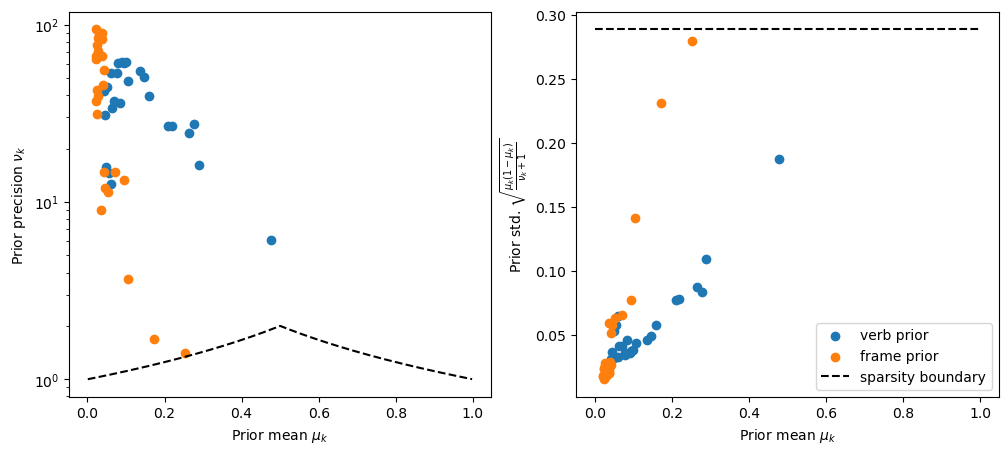

In [43]:
#| code-fold: true
#| code-summary: "Plotting code"

from numpy import mgrid, maximum, sqrt
from matplotlib.pyplot import subplots

fix, (ax1, ax2) = subplots(1, 2, figsize=(12, 5))

verb_component_prior_mean = unconstrained_selection_model.model.verb_component_prior_mean.cumprod(0).data
frame_component_prior_mean = unconstrained_selection_model.model.frame_component_prior_mean.cumprod(0).data

verb_component_prior_precision = unconstrained_selection_model.model.verb_component_prior_precision.data
frame_component_prior_precision = unconstrained_selection_model.model.frame_component_prior_precision.data

ax1.scatter( 
    verb_component_prior_mean,
    verb_component_prior_precision,
    label="verb prior"
)
ax1.scatter( 
    frame_component_prior_mean,
    frame_component_prior_precision,
    label="frame prior"
)

ax2.scatter( 
    verb_component_prior_mean,
    sqrt(verb_component_prior_mean*(1-verb_component_prior_mean)/(verb_component_prior_precision + 1)),
    label="verb prior"
)
ax2.scatter( 
    frame_component_prior_mean,
    sqrt(frame_component_prior_mean*(1-frame_component_prior_mean)/(frame_component_prior_precision + 1)),
    label="frame prior"
)

ax1.set_yscale("log")

ax1.set_xlabel(r"Prior mean $\mu_k$")
ax1.set_ylabel(r"Prior precision $\nu_k$")

ax2.set_xlabel(r"Prior mean $\mu_k$")
ax2.set_ylabel(r"Prior std. $\sqrt{\frac{\mu_k(1-\mu_k)}{\nu_k+1}}$")

ax1.plot(
    mgrid[ZERO:ONE:ZERO], 
    1./maximum(mgrid[ZERO:ONE:ZERO], 1. - mgrid[ZERO:ONE:ZERO]),
    label="sparsity boundary",
    c="black",
    linestyle="--"
)

ax2.plot(
    mgrid[ZERO:ONE:ZERO], 
    [1/sqrt(12)]*mgrid[ZERO:ONE:ZERO].shape[0],
    label="sparsity boundary",
    c="black",
    linestyle="--"
)
_ = ax2.legend()

/opt/conda/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


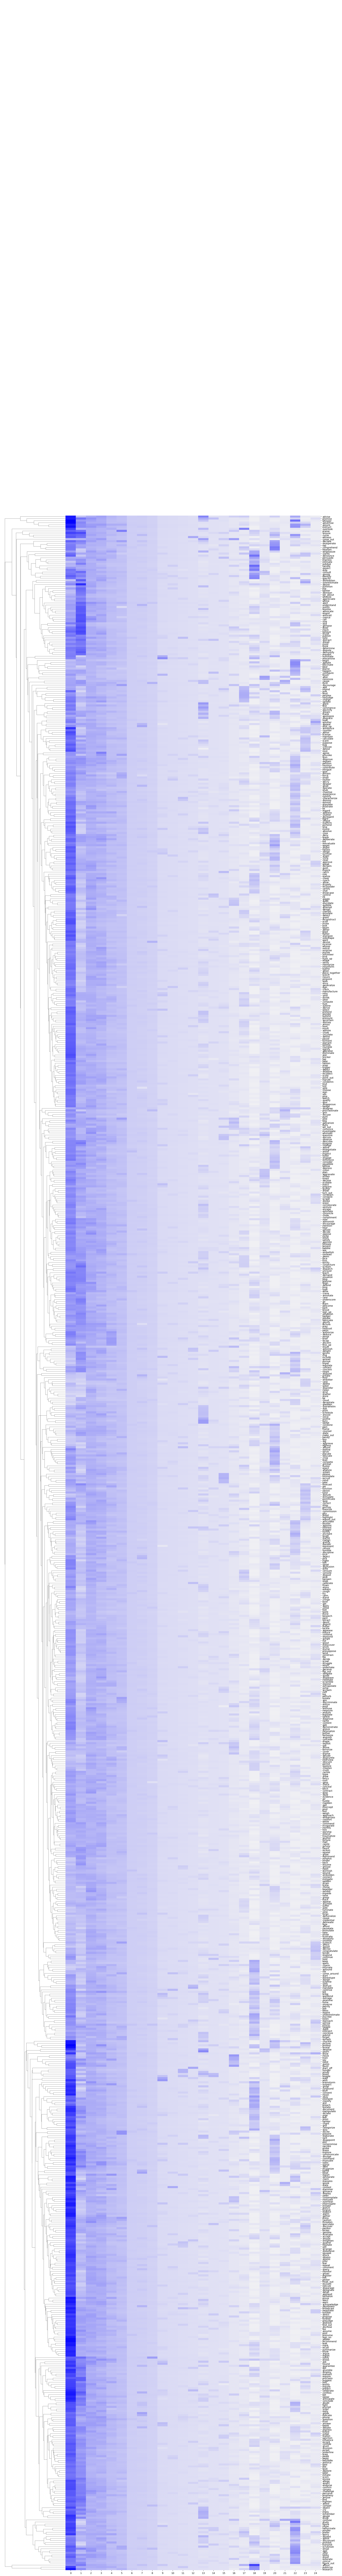

In [44]:
from seaborn import clustermap, color_palette

verb_component_prob = DataFrame(
    unconstrained_selection_model.model.verb_component_prob.data,
    index=unconstrained_selection_model.verb_hash_map
)

clustermap(
    verb_component_prob, 
    cmap=color_palette("light:b", as_cmap=True), 
    yticklabels=True,
    col_cluster=False,
    cbar_pos=None,
    figsize=(20, 150)
)

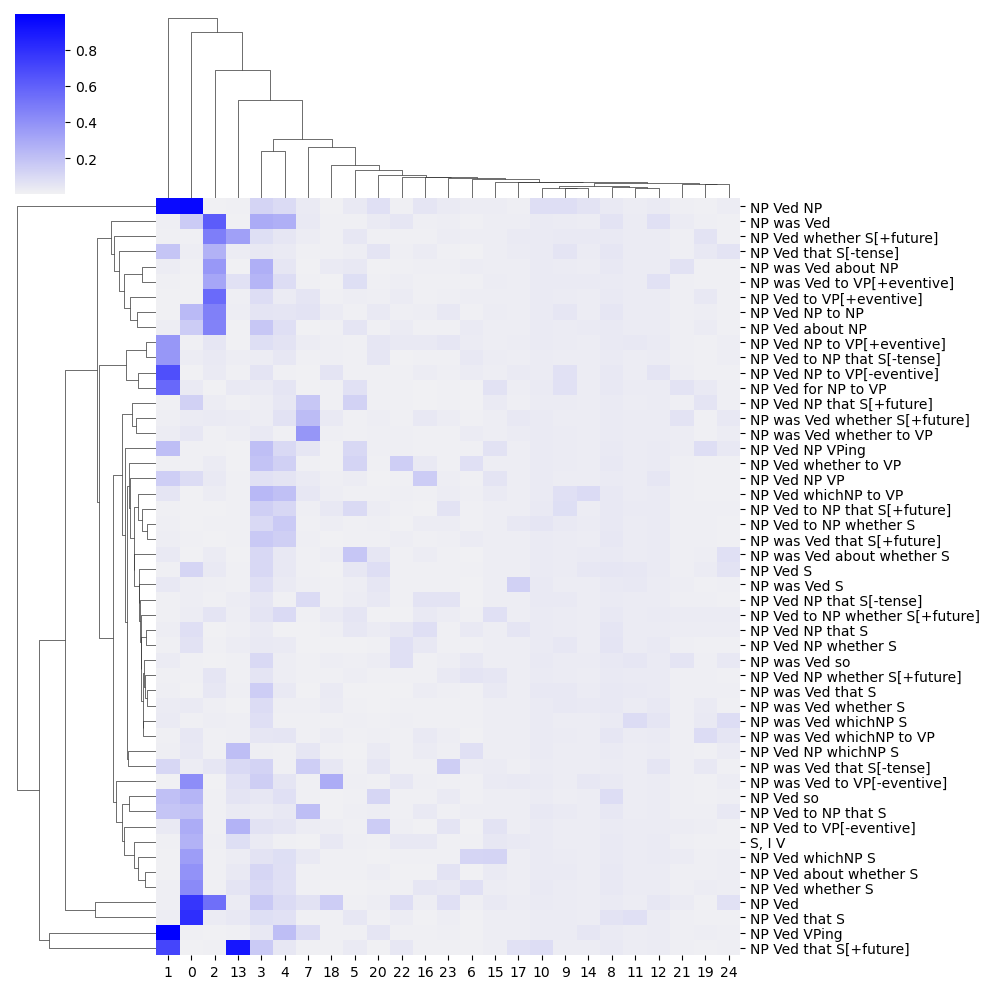

In [45]:
from seaborn import clustermap, color_palette

frame_component_prob = DataFrame(
    unconstrained_selection_model.model.frame_component_prob.data,
    index=unconstrained_selection_model.frame_hash_map
)

clustermap(
    frame_component_prob, 
    cmap=color_palette("light:b", as_cmap=True), 
    yticklabels=True, 
    col_cluster=False
)